In [13]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
# Gráficos
# ==============================================================================
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools
# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [14]:
df = pd.read_csv("./datos/limpieza_holidays_bien.csv",index_col=0)

In [3]:
df = pd.read_csv("./datos/bikes.csv", index_col = 0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# EDA

In [4]:
df.shape

(730, 16)

In [21]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,4,0,1,1,1,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,2018-02-01,4,0,1,0,2,1,2,14.90,17.69,69.61,16.65,131,670,801
2,3,2018-03-01,4,0,1,0,3,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2018-04-01,4,0,1,0,4,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2018-05-01,4,0,1,0,5,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [15]:
df.shape

(730, 16)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.00,183.2500,365.500,547.7500,730.00
season,730.0,2.484932,1.117472,1.00,1.0000,2.000,3.0000,4.00
yr,730.0,0.500000,0.500343,0.00,0.0000,0.500,1.0000,1.00
mnth,730.0,6.526027,3.450215,1.00,4.0000,7.000,10.0000,12.00
holiday,730.0,0.030137,0.171081,0.00,0.0000,0.000,0.0000,1.00
weekday,730.0,3.990411,2.003061,1.00,2.0000,4.000,6.0000,7.00
workingday,730.0,0.684932,0.464862,0.00,0.0000,1.000,1.0000,1.00
weathersit,730.0,1.394521,0.544807,1.00,1.0000,1.000,2.0000,3.00
temp,730.0,20.319329,7.506827,2.42,13.8100,20.465,26.8825,35.33
atemp,730.0,23.726384,8.150247,3.95,16.8925,24.370,30.4450,42.04


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [17]:
df.describe(include = "O").T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df.duplicated().sum()

0

LIMPIEZA

CASTEAMOS la variable dteday a DATETIME.

In [11]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [12]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [13]:
# comprobamos que hemos modificado el tipo de la columna a datetime.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

Vamos a corregir los valores de season  y además los casteamos a int. (primavera:1, verano:2, otoño:3, invierno:4)

In [14]:
season_cambio = {"spring":4, "summer":1, "autumn": 2, "winter":3}

In [15]:
df["season"]=df["season"].map(season_cambio)

In [16]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,4,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,4,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


Vamos a redondear los float a dos decimales. 

In [17]:
df = df.round(2)

In [18]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,4,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,2018-02-01,4,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,2018-03-01,4,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2018-04-01,4,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2018-05-01,4,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600
5,6,2018-06-01,4,0,1,0,4,1,1,8.38,11.66,51.83,6.00,88,1518,1606
6,7,2018-07-01,4,0,1,0,5,1,2,8.06,10.44,49.87,11.30,148,1362,1510
7,8,2018-08-01,4,0,1,0,6,0,2,6.76,8.11,53.58,17.88,68,891,959
8,9,2018-09-01,4,0,1,0,0,0,1,5.67,5.81,43.42,24.25,54,768,822
9,10,2018-10-01,4,0,1,0,1,1,1,6.18,7.54,48.29,14.96,41,1280,1321


Vamos a corregir los valores de weekday (lunes:1, domingo 7)

In [19]:
semana_cambio = {6:1, 0:2, 1:3, 2:4, 3:5, 4:6, 5:7}

In [20]:
df["weekday"]=df["weekday"].map(semana_cambio)

In [21]:
df.isnull().sum()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,4,0,1,0,1,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,2018-02-01,4,0,1,0,2,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,2018-03-01,4,0,1,0,3,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2018-04-01,4,0,1,0,4,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2018-05-01,4,0,1,0,5,1,1,9.31,11.46,43.70,12.52,82,1518,1600
5,6,2018-06-01,4,0,1,0,6,1,1,8.38,11.66,51.83,6.00,88,1518,1606
6,7,2018-07-01,4,0,1,0,7,1,2,8.06,10.44,49.87,11.30,148,1362,1510
7,8,2018-08-01,4,0,1,0,1,0,2,6.76,8.11,53.58,17.88,68,891,959
8,9,2018-09-01,4,0,1,0,2,0,1,5.67,5.81,43.42,24.25,54,768,822
9,10,2018-10-01,4,0,1,0,3,1,1,6.18,7.54,48.29,14.96,41,1280,1321


### Investigamos la existencia de *outliers* y decidir que podríamos hacer con ellos, con las herramientas aprendidas en el módulo 2.

NameError: name 'numericas' is not defined

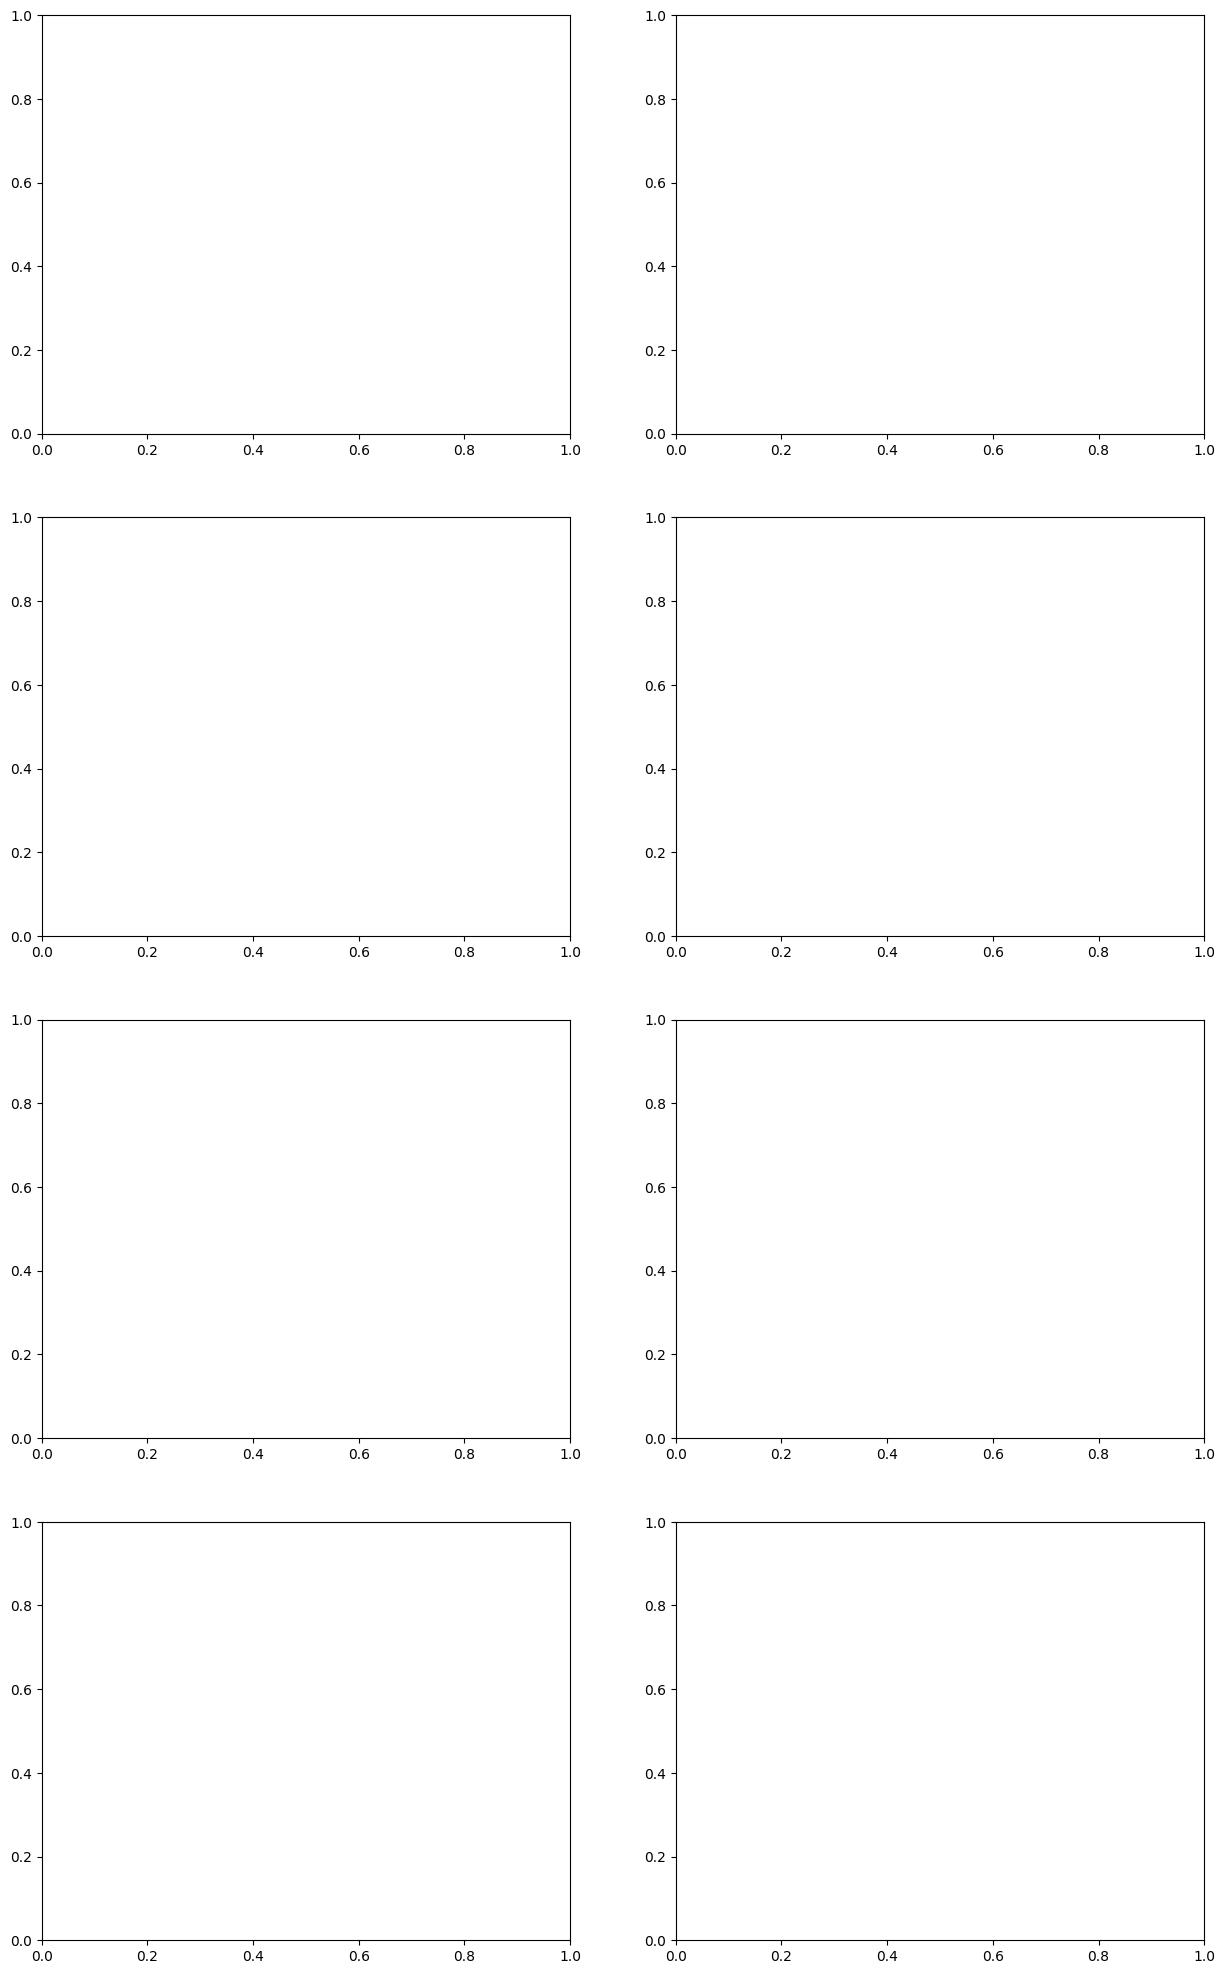

In [18]:
# para numéricas

fig, axes = plt.subplots(4, 2, figsize=(15,25))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()

fig.delaxes(axes[-1])
plt.show()

In [22]:
df.to_csv("./datos/limpieza.csv")

In [ ]:
# A partir del csv limpieza, generamos manualmente y fuera del código el csv "limpieza_holidays_bien" introduciendo a mano los días festivos

In [ ]:
df2=pd.read_csv('./datos/limpieza_holidays_bien.csv', sep=';', index_col=0)
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,4,0,1,1,1,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,2018-02-01,4,0,1,0,2,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,2018-03-01,4,0,1,0,3,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2018-04-01,4,0,1,0,4,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2018-05-01,4,0,1,0,5,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [ ]:
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,4,0,1,1,1,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,2018-02-01,4,0,1,0,2,1,2,14.90,17.69,69.61,16.65,131,670,801
2,3,2018-03-01,4,0,1,0,3,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2018-04-01,4,0,1,0,4,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2018-05-01,4,0,1,0,5,1,1,9.31,11.46,43.70,12.52,82,1518,1600


# Análisis visual exploratorio

In [ ]:
# Dejamos preparados dataframes para numericas y categóricas

In [ ]:
numericas = df2.select_dtypes(include= np.number).drop(["instant","season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"], axis=1)
numericas.head(1)

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.11,18.18,80.58,10.75,331,654,985


In [ ]:
categoricas = df[['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']]
categoricas.head(1)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit
0,2018-01-01,4,0,1,0,1,0,2


Histogramas de distribución de variables numéricas

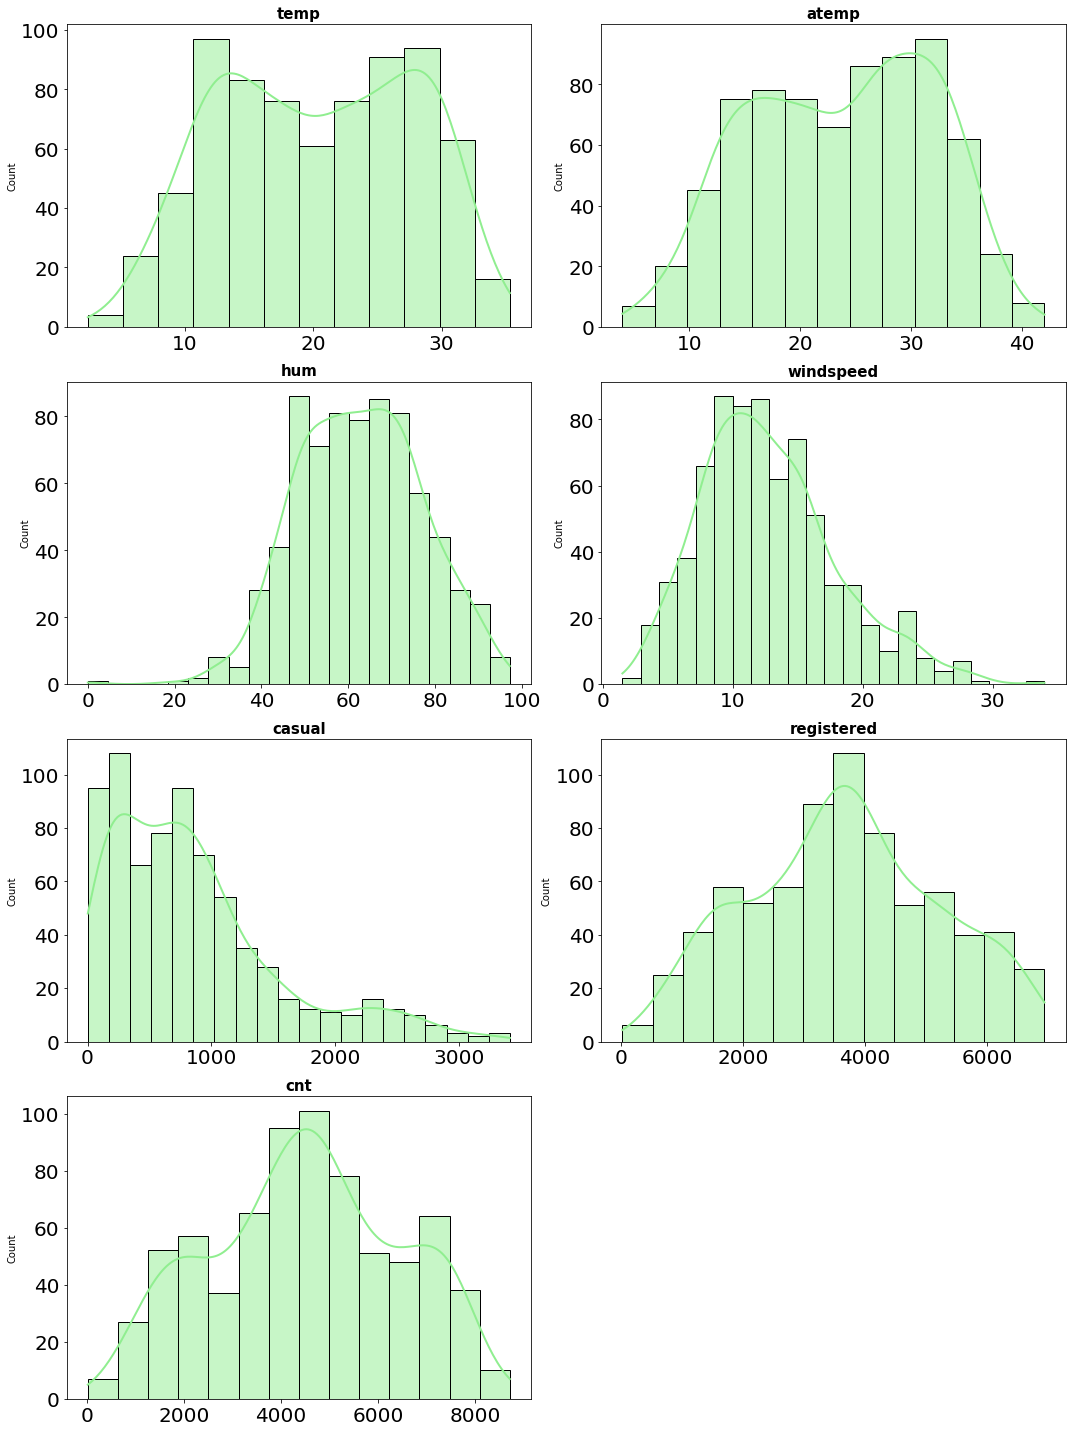

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,20))

axes = axes.flat

for i, colum in enumerate(numericas): 
    sns.histplot(
    data = df2,
    x = colum,
    kde = True, 
    color = "lightgreen", 
    line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
    alpha = 0.5, # para especificar la transparencia del color
    ax = axes[i])


    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


fig.delaxes(axes[-1])
fig.tight_layout()

Boxplots de las variables numéricas

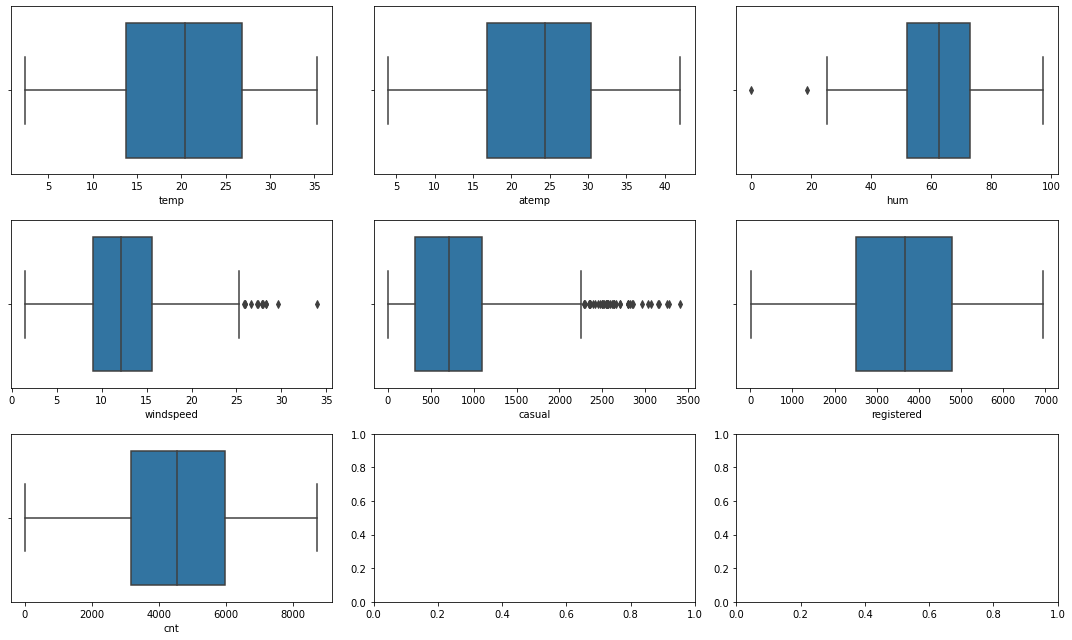

In [34]:
fig, axes = plt.subplots (nrows=3, ncols=3, figsize = (15,9))
axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x= columna, data = df, ax = axes[indice])
    
plt.tight_layout()
plt.show()

In [ ]:
## Pensar que vamos a hacer con los outliers

Observación de la asunción de normalidad gráficamente en posibles variables respuesta (cnt, registered, casual)

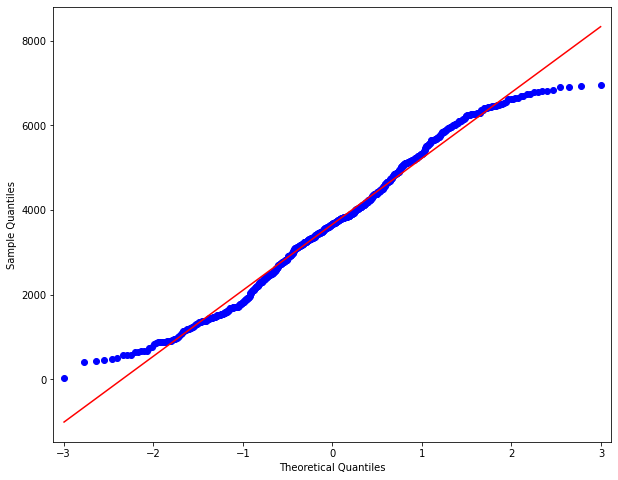

In [36]:
sm.qqplot(df['registered'], line= 's');

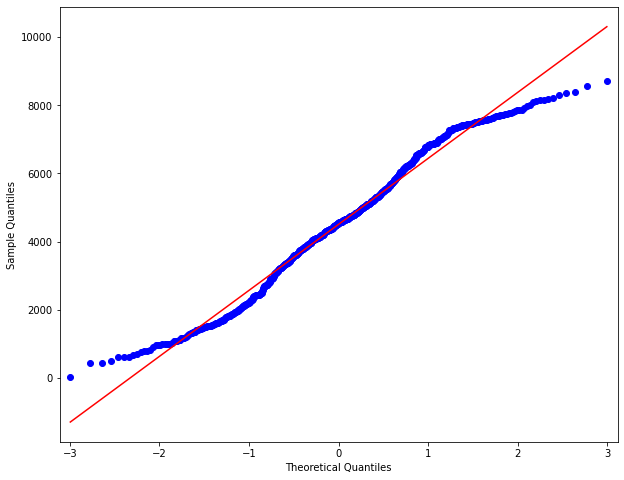

In [37]:
sm.qqplot(df['cnt'], line= 's');

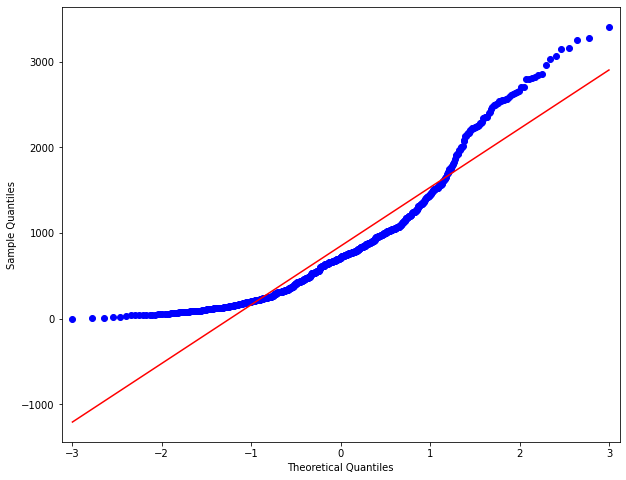

In [38]:
sm.qqplot(df['casual'], line= 's');

Correlación y heatmaps